In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("yolo_boats_POST_FAT_epoch_025.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [65]:
df = pd.read_csv("yolo_boats_test_NOrandom.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [51]:
df

,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error
0,valid,conv2d_1,0,32.0,1004.0,0.974376,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
1,valid,conv2d_1,0,29.0,1004.0,0.980339,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
2,valid,conv2d_1,0,29.0,1004.0,0.973331,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
3,valid,conv2d_1,0,30.0,1004.0,0.975002,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
4,valid,conv2d_1,0,21.0,1004.0,0.982905,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92353,valid,batch_normalization_9,101,32.0,1004.0,0.979128,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
92354,valid,batch_normalization_9,101,32.0,1004.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
92355,valid,batch_normalization_9,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes
92356,valid,batch_normalization_9,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes


In [25]:
def get_x():
    x = ["batch_normalization"]
    for i in range(1, 10):
        x.append("batch_normalization_"+str(i))
    x += ["batch_normalization_25", "batch_normalization_42", "batch_normalization_56", "batch_normalization_71"]
    x.append("conv2d")
    for i in range(1, 10):
        x.append("conv2d_"+str(i))
    x += ["conv2d_25", "conv2d_42", "conv2d_56", "conv2d_71"]
    return x

Number of boxes in output (equal number of boxes is good)

In [66]:
equal_num_boxes = df.loc[df["Golden_num_boxes"] == df["Faulty_num_boxes"]].shape[0]

ratio_equal_num_boxes = 100*(equal_num_boxes/df.shape[0])
print("Ratio of equal number of boxes = ", str(ratio_equal_num_boxes))

Ratio of equal number of boxes =  69.10667518906719


**Visualize percentage of non equal number of boxes per layer**

In [67]:
new_col = [row["Golden_num_boxes"] != row["Faulty_num_boxes"] for index, row in df.iterrows()]
df["Not_equal_num_boxes"] = new_col

In [68]:
temp_df = df.dropna(subset = ["Golden_num_boxes", "Faulty_num_boxes"])
temp_df = temp_df.groupby(by = ["Layer_name"])["Not_equal_num_boxes"].mean()
temp_df = temp_df.to_frame()
temp_df = temp_df.reindex(get_x())
temp_df

,Not_equal_num_boxes
Layer_name,
batch_normalization,0.577760
batch_normalization_1,0.638720
batch_normalization_2,0.229760
batch_normalization_3,0.395840
batch_normalization_4,0.483360
batch_normalization_5,0.589280
batch_normalization_6,0.326080
batch_normalization_7,0.389440
batch_normalization_8,0.263360


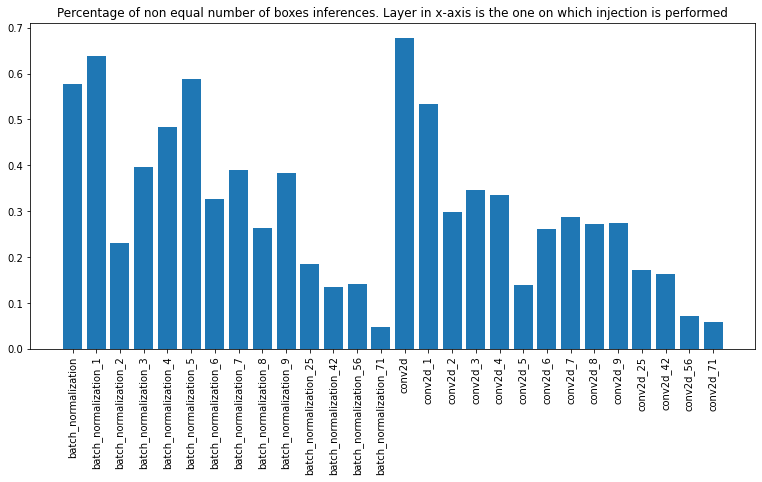

In [69]:
x_labels = [i for i in temp_df.index]
plt.figure(figsize=(13,6))
plt.bar(range(len(temp_df)), temp_df["Not_equal_num_boxes"], align='center')
plt.xticks(range(len(temp_df)), x_labels, rotation = 90)
plt.title("Percentage of non equal number of boxes inferences. Layer in x-axis is the one on which injection is performed")
plt.plot()

temp_df["Not_equal_num_boxes"].to_csv("EEEE.csv")

**Visualize the magnitude of difference between Golden number of boxes and Faulty number of boxes**

In [14]:
temp_df = df.dropna(subset = ["Golden_num_boxes", "Faulty_num_boxes"]).copy()
new_col = [abs(row["Golden_num_boxes"] - row["Faulty_num_boxes"]) for index, row in temp_df.iterrows()]
temp_df["Diff_num_boxes"] = new_col
temp_df = temp_df.groupby(by = ["Layer_name"])["Diff_num_boxes"].mean()
temp_df = temp_df.to_frame()
temp_df = temp_df.reindex(get_x())

[]

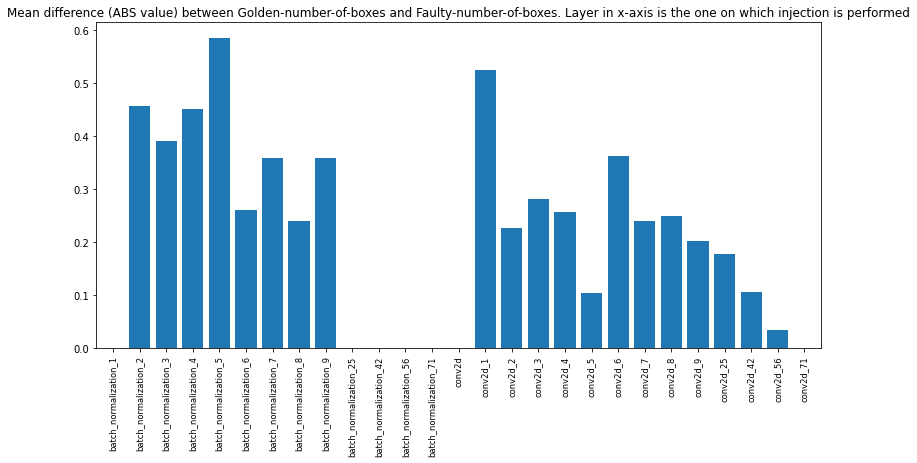

In [15]:
x_labels = [i for i in temp_df.index]
plt.figure(figsize=(13,6))
plt.bar(range(len(temp_df)), temp_df["Diff_num_boxes"], align='center')
plt.xticks(range(len(temp_df)), x_labels, size='small', rotation = 90)
plt.title("Mean difference (ABS value) between Golden-number-of-boxes and Faulty-number-of-boxes. Layer in x-axis is the one on which injection is performed")
plt.plot()

**Deeper analysis of batch_normalization_25**

In [39]:
temp_df = df.loc[df["Layer_name"] == "batch_normalization_25"]
temp_df

,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error,Not_equal_num_boxes


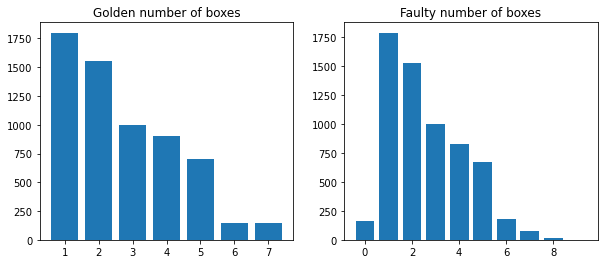

In [18]:
golden_vals = temp_df.groupby(by = "Golden_num_boxes").count()
faulty_vals = temp_df.groupby(by = "Faulty_num_boxes").count()

figure, axis = plt.subplots(1, 2, figsize = (10, 4))
plt.title("Number of boxes - Value ditributions")

axis[0].bar(golden_vals.index.values, golden_vals["Set"].values)
axis[0].set_title("Golden number of boxes")

axis[1].bar(faulty_vals.index.values, faulty_vals["Set"].values)
axis[1].set_title("Faulty number of boxes")

plt.show()

**Deeper analysis of batch_normalization_42**

In [19]:
temp_df = df.loc[df["Layer_name"] == "batch_normalization_42"]
temp_df

,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error,Not_equal_num_boxes
120225,valid,batch_normalization_42,0,32.0,1004.0,0.994936,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,NaN,False
120226,valid,batch_normalization_42,0,32.0,1004.0,0.991794,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,NaN,False
120227,valid,batch_normalization_42,0,32.0,1004.0,0.998840,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,NaN,False
120228,valid,batch_normalization_42,0,32.0,1004.0,0.997909,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,NaN,False
120229,valid,batch_normalization_42,0,32.0,1004.0,0.997655,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139006,test,batch_normalization_42,31,32.0,1004.0,0.965407,3.0,3.0,1.0,1.000000,1.0,3.0,0.0,0.0,NaN,False
139007,test,batch_normalization_42,31,32.0,1004.0,0.993308,3.0,3.0,1.0,1.000000,1.0,3.0,0.0,0.0,NaN,False
139008,test,batch_normalization_42,31,32.0,1004.0,0.674890,3.0,2.0,1.0,0.666667,0.8,2.0,0.0,1.0,NaN,True
139009,test,batch_normalization_42,31,32.0,1004.0,0.993634,3.0,3.0,1.0,1.000000,1.0,3.0,0.0,0.0,NaN,False


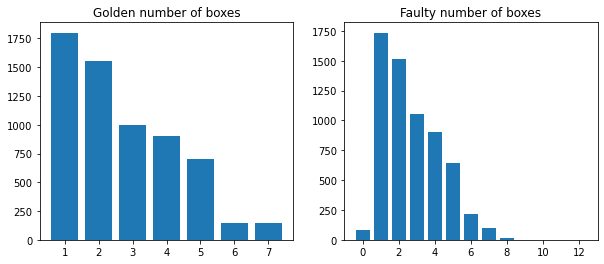

In [20]:
golden_vals = temp_df.groupby(by = "Golden_num_boxes").count()
faulty_vals = temp_df.groupby(by = "Faulty_num_boxes").count()

figure, axis = plt.subplots(1, 2, figsize = (10, 4))
plt.title("Number of boxes - Value ditributions")

axis[0].bar(golden_vals.index.values, golden_vals["Set"].values)
axis[0].set_title("Golden number of boxes")

axis[1].bar(faulty_vals.index.values, faulty_vals["Set"].values)
axis[1].set_title("Faulty number of boxes")

plt.show()

## F1 score analysis

In [21]:
df["F1<1"] = [row["F1_score"] < 1 for i, row in df.iterrows()]

In [22]:
temp_df = df.dropna(subset = ["Golden_num_boxes", "Faulty_num_boxes"])
temp_df = temp_df.groupby(by = ["Layer_name"])["Not_equal_num_boxes"].mean()
temp_df = temp_df.to_frame()
temp_df = temp_df.reindex(get_x())
a = temp_df

In [24]:
temp_df = df.dropna(subset = ["F1_score"])
temp_df = temp_df.groupby(by = ["Layer_name"])["F1<1"].mean()
temp_df = temp_df.to_frame()
temp_df = temp_df.reindex(get_x())
b = temp_df

[]

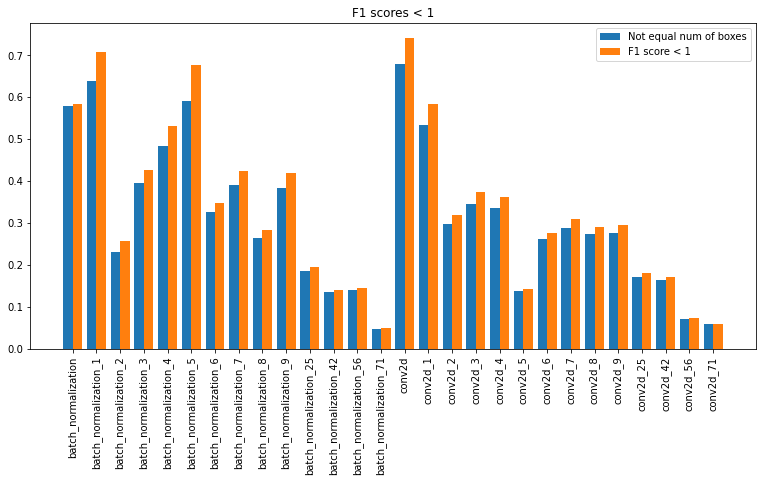

In [25]:
x_labels = [i for i in a.index]
plt.figure(figsize=(13,6))
X_axis = np.arange(len(a))
plt.bar(X_axis-0.2, a["Not_equal_num_boxes"], width = 0.4, label = "Not equal num of boxes")
plt.bar(X_axis+0.2, b["F1<1"], width = 0.4, label = "F1 score < 1")
plt.xticks(X_axis, x_labels, rotation = 90)
plt.title("F1 scores < 1")
plt.legend()
plt.plot()

In [29]:
temp_df = df.dropna(subset = ["Golden_num_boxes", "Faulty_num_boxes", "F1_score"])
temp_df = temp_df.loc[temp_df["Golden_num_boxes"] == temp_df["Faulty_num_boxes"]]
temp_df = temp_df.groupby(by = ["Layer_name"])["F1<1"].mean()
temp_df = temp_df.to_frame()
temp_df = temp_df.reindex(get_x())

[]

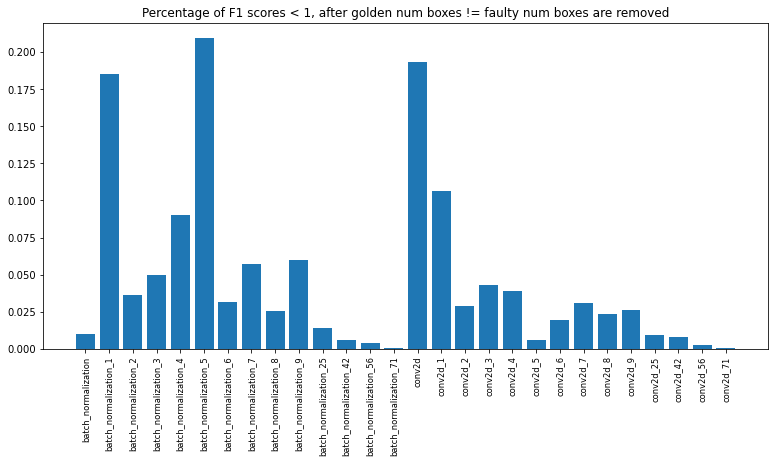

In [30]:
x_labels = [i for i in temp_df.index]
plt.figure(figsize=(13,6))
plt.bar(range(len(temp_df)), temp_df["F1<1"], align='center')
plt.xticks(range(len(temp_df)), x_labels, size='small', rotation = 90)
plt.title("Percentage of F1 scores < 1, after golden num boxes != faulty num boxes are removed")
plt.plot()

In [31]:
temp_df = df.dropna(subset = ["Golden_num_boxes", "Faulty_num_boxes", "F1_score"])
temp_df = temp_df.loc[temp_df["Golden_num_boxes"] == temp_df["Faulty_num_boxes"]]
a = temp_df.groupby(by = ["Layer_name"])["F1<1"].count()
a = a.to_frame()
a = a.reindex(get_x())
temp_df = temp_df.groupby(by = ["Layer_name"])["F1<1"].sum()
temp_df = temp_df.to_frame()
b = temp_df.reindex(get_x())

[]

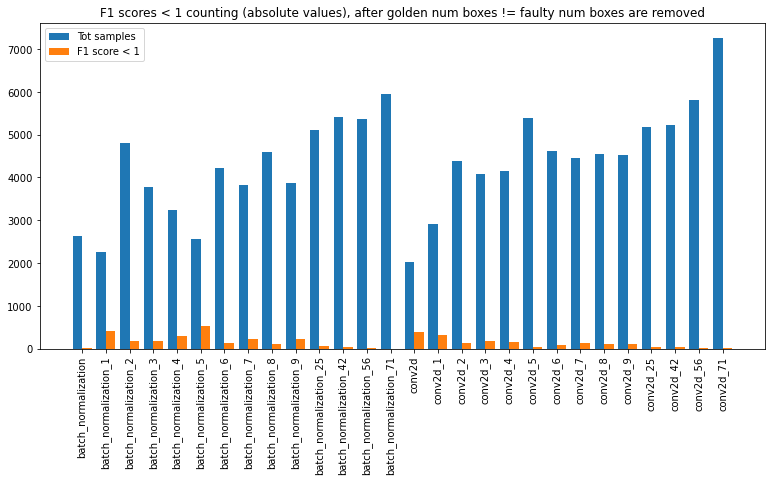

In [32]:
x_labels = [i for i in a.index]
plt.figure(figsize=(13,6))
X_axis = np.arange(len(a))
plt.bar(X_axis-0.2, a["F1<1"], width = 0.4, label = "Tot samples")
plt.bar(X_axis+0.2, b["F1<1"], width = 0.4, label = "F1 score < 1")
plt.xticks(X_axis, x_labels, rotation = 90)
plt.title("F1 scores < 1 counting (absolute values), after golden num boxes != faulty num boxes are removed")
plt.legend()
plt.plot()

## IOU analysis 

**Conv2d (first layer)**

In [38]:
temp_df = df.loc[df["Layer_name"] == "conv2d"]
tot_samples = len(temp_df)
print("Total number of samples = ", tot_samples)
isna = temp_df["IOU"].isna().sum()
print("Number of IOU nan values = ", str(isna), "  (", str(100 * isna / tot_samples), "%)")
isna_fault_0 = temp_df.loc[temp_df["Faulty_num_boxes"] == 0]["IOU"].isna().sum()
print("Number of IOU nan values (when Faulty num of boxes = 0) = ", str(isna_fault_0), "  (", str(100* isna_fault_0 / tot_samples), "%)")
isna_error = temp_df.dropna(subset = ["Error"])["IOU"].isna().sum()
print("Number of IOU nan values (when an Error occurred) = ", str(isna_error), "  (", str(100*isna_error / tot_samples), "%)")
print("Errors occurred = ", str(temp_df.dropna(subset = ["Error"])["Error"].unique()))
temp_df = temp_df.dropna(subset = ["IOU"])
temp_df

Total number of samples =  6262
Number of IOU nan values =  1909   ( 30.485467901628873 %)
Number of IOU nan values (when Faulty num of boxes = 0) =  1617   ( 25.822420951772596 %)
Number of IOU nan values (when an Error occurred) =  12   ( 0.1916320664324497 %)
Errors occurred =  ['Golden prediction has no boxes']


,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error,Not_equal_num_boxes,F1<1
0,valid,conv2d,0,29.0,1004.0,0.906302,1.0,1.0,1.000000,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
2,valid,conv2d,0,22.0,1004.0,0.906705,1.0,1.0,1.000000,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
4,valid,conv2d,0,25.0,1004.0,0.902934,1.0,1.0,1.000000,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
5,valid,conv2d,0,26.0,1004.0,0.933378,1.0,1.0,1.000000,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
7,valid,conv2d,0,26.0,1004.0,0.967073,1.0,1.0,1.000000,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143361,test,conv2d,31,1.0,-1.0,0.993208,3.0,3.0,1.000000,1.000000,1.000000,3.0,0.0,0.0,NaN,False,False
143364,test,conv2d,31,20.0,1004.0,0.339599,3.0,2.0,0.500000,0.333333,0.400000,1.0,1.0,2.0,NaN,True,True
143365,test,conv2d,31,26.0,1004.0,0.282301,3.0,3.0,0.333333,0.333333,0.333333,1.0,2.0,2.0,NaN,False,True
143367,test,conv2d,31,19.0,1004.0,0.621345,3.0,2.0,1.000000,0.666667,0.800000,2.0,0.0,1.0,NaN,True,True


Plotting distribution of IOU values (after removed all nan values)

Dataframe's size at this point =  4353


[]

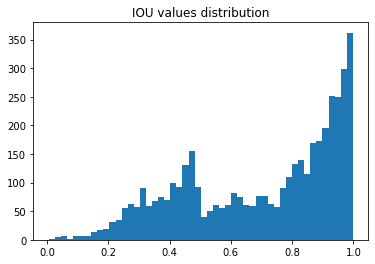

In [39]:
print("Dataframe's size at this point = ", str(len(temp_df)))
plt.title("IOU values distribution")
plt.hist(temp_df["IOU"], bins=50)
plt.plot()

Distribution of IOU values removing nan values and samples where golden num-of-boxes != faulty num-of-boxes

Dataframe's size at this point =  1866


[]

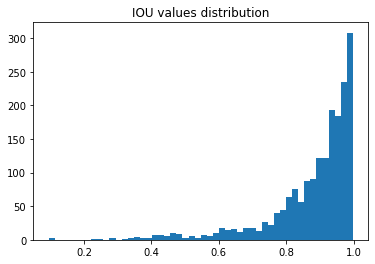

In [40]:
temp_df = temp_df.loc[temp_df["Golden_num_boxes"] == temp_df["Faulty_num_boxes"]]
print("Dataframe's size at this point = ", str(len(temp_df)))
plt.title("IOU values distribution")
plt.hist(temp_df["IOU"], bins=50)
plt.plot()

**Conv2d_1**

In [41]:
temp_df = df.loc[df["Layer_name"] == "conv2d_1"]
tot_samples = len(temp_df)
print("Total number of samples = ", tot_samples)
isna = temp_df["IOU"].isna().sum()
print("Number of IOU nan values = ", str(isna), "  (", str(100 * isna / tot_samples), "%)")
isna_fault_0 = temp_df.loc[temp_df["Faulty_num_boxes"] == 0]["IOU"].isna().sum()
print("Number of IOU nan values (when Faulty num of boxes = 0) = ", str(isna_fault_0), "  (", str(100* isna_fault_0 / tot_samples), "%)")
isna_error = temp_df.dropna(subset = ["Error"])["IOU"].isna().sum()
print("Number of IOU nan values (when an Error occurred) = ", str(isna_error), "  (", str(100*isna_error / tot_samples), "%)")
print("Errors occurred = ", str(temp_df.dropna(subset = ["Error"])["Error"].unique()))
temp_df = temp_df.dropna(subset = ["IOU"])
temp_df

Total number of samples =  6262
Number of IOU nan values =  885   ( 14.132864899393166 %)
Number of IOU nan values (when Faulty num of boxes = 0) =  715   ( 11.418077291600127 %)
Number of IOU nan values (when an Error occurred) =  12   ( 0.1916320664324497 %)
Errors occurred =  ['Golden prediction has no boxes']


,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error,Not_equal_num_boxes,F1<1
9618,valid,conv2d_1,0,27.0,1004.0,0.989838,1.0,2.0,0.5,1.000000,0.666667,1.0,1.0,0.0,NaN,True,True
9619,valid,conv2d_1,0,32.0,1004.0,0.944798,1.0,1.0,1.0,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
9620,valid,conv2d_1,0,21.0,1004.0,0.985239,1.0,1.0,1.0,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
9621,valid,conv2d_1,0,22.0,1004.0,0.978907,1.0,1.0,1.0,1.000000,1.000000,1.0,0.0,0.0,NaN,False,False
9622,valid,conv2d_1,0,30.0,1004.0,0.975481,1.0,2.0,0.5,1.000000,0.666667,1.0,1.0,0.0,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146271,test,conv2d_1,31,30.0,1004.0,0.950183,3.0,3.0,1.0,1.000000,1.000000,3.0,0.0,0.0,NaN,False,False
146272,test,conv2d_1,31,26.0,1004.0,0.641295,3.0,2.0,1.0,0.666667,0.800000,2.0,0.0,1.0,NaN,True,True
146273,test,conv2d_1,31,28.0,1004.0,0.657723,3.0,2.0,1.0,0.666667,0.800000,2.0,0.0,1.0,NaN,True,True
146274,test,conv2d_1,31,22.0,1004.0,0.352296,3.0,1.0,1.0,0.333333,0.500000,1.0,0.0,2.0,NaN,True,True


Plotting distribution of IOU values (after removed all nan values)

Dataframe's size at this point =  5377


[]

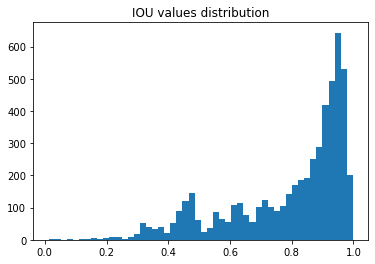

In [42]:
print("Dataframe's size at this point = ", str(len(temp_df)))
plt.title("IOU values distribution")
plt.hist(temp_df["IOU"], bins=50)
plt.plot()

Distribution of IOU values removing nan values and samples where golden num-of-boxes != faulty num-of-boxes

Dataframe's size at this point =  2827


[]

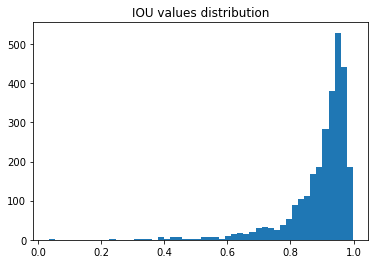

In [43]:
temp_df = temp_df.loc[temp_df["Golden_num_boxes"] == temp_df["Faulty_num_boxes"]]
print("Dataframe's size at this point = ", str(len(temp_df)))
plt.title("IOU values distribution")
plt.hist(temp_df["IOU"], bins=50)
plt.plot()

***********************

In [44]:
temp_df = df.loc[df["Layer_name"] == "conv2d_1"]
temp_df = temp_df.dropna(subset = ["Error"])
temp_df

,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error,Not_equal_num_boxes,F1<1
9668,valid,conv2d_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
10969,valid,conv2d_1,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
11420,valid,conv2d_1,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
11671,valid,conv2d_1,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
12622,valid,conv2d_1,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
12823,valid,conv2d_1,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
13124,valid,conv2d_1,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
13975,valid,conv2d_1,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
14426,valid,conv2d_1,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
145023,test,conv2d_1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False


In [45]:
temp_df = df.loc[df["Layer_name"] == "conv2d"]
temp_df = temp_df.dropna(subset = ["Error"])
temp_df

,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error,Not_equal_num_boxes,F1<1
50,valid,conv2d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
1351,valid,conv2d,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
1802,valid,conv2d,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
2053,valid,conv2d,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
3004,valid,conv2d,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
3205,valid,conv2d,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
3506,valid,conv2d,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
4357,valid,conv2d,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
4808,valid,conv2d,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
142117,test,conv2d,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False


In [46]:
temp_df = df.loc[df["Layer_name"] == "batch_normalization"]
temp_df = temp_df.dropna(subset = ["Error"])
temp_df

,Set,Layer_name,Sample_id,Cardinality,Pattern,IOU,Golden_num_boxes,Faulty_num_boxes,Precision,Recall,F1_score,True_positives,False_positives,False_negatives,Error,Not_equal_num_boxes,F1<1
4859,valid,batch_normalization,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
6160,valid,batch_normalization,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
6611,valid,batch_normalization,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
6862,valid,batch_normalization,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
7813,valid,batch_normalization,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
8014,valid,batch_normalization,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
8315,valid,batch_normalization,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
9166,valid,batch_normalization,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
9617,valid,batch_normalization,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False
143570,test,batch_normalization,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Golden prediction has no boxes,True,False


In [23]:
len(temp_df)

24